# Ejercicio Practico 7
## Analisis de Componentes Principales y Factorial

Para estos 2 últimos temas del módulo de minería de datos, vamos a emplear el mismo conjunto de datos y a través de él, iremos viendo y analizando los datos mediante técnicas como el analisis de componentes principales (PCA) o el analisis factorial (AF) y, después pasaremos a clusterizar o segmentar los datos mediante métodos de clusterización.

El conjunto de datos es una base de datos de paises de todo el mundo donde cada variable habla sobre un indicador de los países. Indicadores economicos, sociales, etc. La idea es analizar estos datos y luego en cada uno de los apartados de esta práctica, perseguiremos un objetivo u otro.

### 1. PCA (Analisis de Componentes Principales)

Empezamos la práctica con un analisis de compoenentes principales. El objetivo de este tipo de analisis es encontrar un número adecuado de componentes que sean capaces de maximizar en ellas la varianza explicada por las componentes originales. Todo ello, buscando reducir el número de variables eliminando la dependencia lineal o el exceso de correlación entre unas y otras.

En primer lugar vamos a importar las librerías de python que serán necesarias para realizar el analisis y a continuación empezaremos cargando los datos como habitualmente hacemos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, FactorAnalyzer
from sklearn.cluster import KMeans
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
pd.set_option('display.max_rows', None)

# Cargar los datos a un dataframe
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Una vez cargados los datos, vamos a ver que pinta tienen y a describir lo que vemos.

En primera instancia vemos que cada fila se corresponde con un país distinto. Tenemos un total de 167 paises de todo el mundo. El total de variables son 10 incluyendo el nombre del pais.

Todas las variables son numéricas a excepción del nombre del pais que como es lógico es una variable categórica de texto. No aporta mucha info ya que cada registro es un país distinto por lo que la ignoraremos para el analisis salvo para ponerle nombre y apellidos a los paises cuando sea necesario o para ayudarnos a interpretar el analisis.

No tenemos presencia de valores nulos auqnue si que podría haber outliers. En este ejercicio asumiremos que no tenemos outliers por no entretenernos mucho en analizarlos.

Vamos a sacar algunos números de estas variables para entender un poco los rangos en que se mueven y ya de paso describimos las variables:

In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Vamos variable por variable hablando de cada una de ellas:
   + ***child_mort***: la mortalidad infantil. Esta variable nos indica cuántos menores de 5 años mueren de cada 1000. Tenemos valores entre 2 y 210 más o menos. Un promedio de 38 niños con una mediana de 19, lo que nos indica que tenemos la distribución asimétrica con una cola larga hacía valores más altos.
   + ***exports***: el nivel de exportaciones del país. Este valor viene expresado como un porcentaje respecto del producto interior bruto (GDP). Su rango al ser porcentaje debería estar normalmente entre 0% y 100% pero hay valores que superan con creces el valor del GDP y por ello llegamos incluso al 200%.
   + ***health***: esta variable es un indicador general de salud de los habitantes del pais. En este caso, el rango se mueve entre 0 y 18 como máximo valor. Parece un adistribución bastante centrada y simétrica puesto que su media y mediana se parecen mucho y, salvo por algun que otro outlier que se va a 18 o similar, la desviación estandar es bastante moderada.
   + ***imports***: Al igual que con las exportaciones, las importaciones se expresan como porcentaje del GDP. Tienen rangos similares.
   + ***income***: hace referencia al nivel de ingresos medio por habitante de cada país. Tenemos una media bastante alejada de la mediana y por tanto la asimetría de esta distribución seguramente será clara. Posiblemente debido a outliers o una cola que decrece muy lentamente.
   + ***inflation***: el crecimiento anual del dato de inflación, hace referencia a la subida de los precios de un año para otro. Valores entre -4 y 104 es por donde se mueve. Los valores negativos hacen referencia a deflación y por tanto entornos económicos de bajadas de precios generalizados. Por otro lado, economías con hiperinflación que sufren de subidas de precios interanuales de más de 100 puntos.
   + ***life_expec***: la esperanza de vida que tiene un recien nacido si se mantienen las tasas y pautas de mortalidad en el país. Una variable medida en años de vida y que por tanto va en un rago entre los 9 años y 82. En este caso la distribución parece asimétrica en el otro sentido. Es decir, la gran mayoría se acumula entorno a los 70 años con 10 años de desviación estandar y luego una cola hacía valores menores que promueven la asimetría de la distribución.
   + ***total_fer***: el número de hijos que da a luz en media una mujer en edad fertil si se mantienen los patrones de fertilidad y las condiciones de contorno. El rango aquí es más corto, nos movemos entre 1 hijo y casi 8. Con una media de 3 y desviación de 1.5 años.
   + ***gdpp***: se trata del producto interior bruto. Está medido en terminos absolutos seguramente en alguna moneda estandarizada par que todos los paises se puedan valorar en las mismas unidades. Vovlemos a una distribución muy asimétrica donde difiere mucho la media y la mediana y por tanto la cola hacia valores mayores y por tanto la posible presencia de outliers, genera la asimetría de la distribución.

Pasamos ahora a crear un dataframe sin la única variable que no es númerica y que siendo categórica no aporta mucho, ***Country***, que viene a decirnos el nombre del país.

In [5]:
# Variables númericas
df_num = data.drop('country', axis=1)
df_num.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Vamos a pintar las distriubuciones de las variable y así confirmamos nuestras sospechas

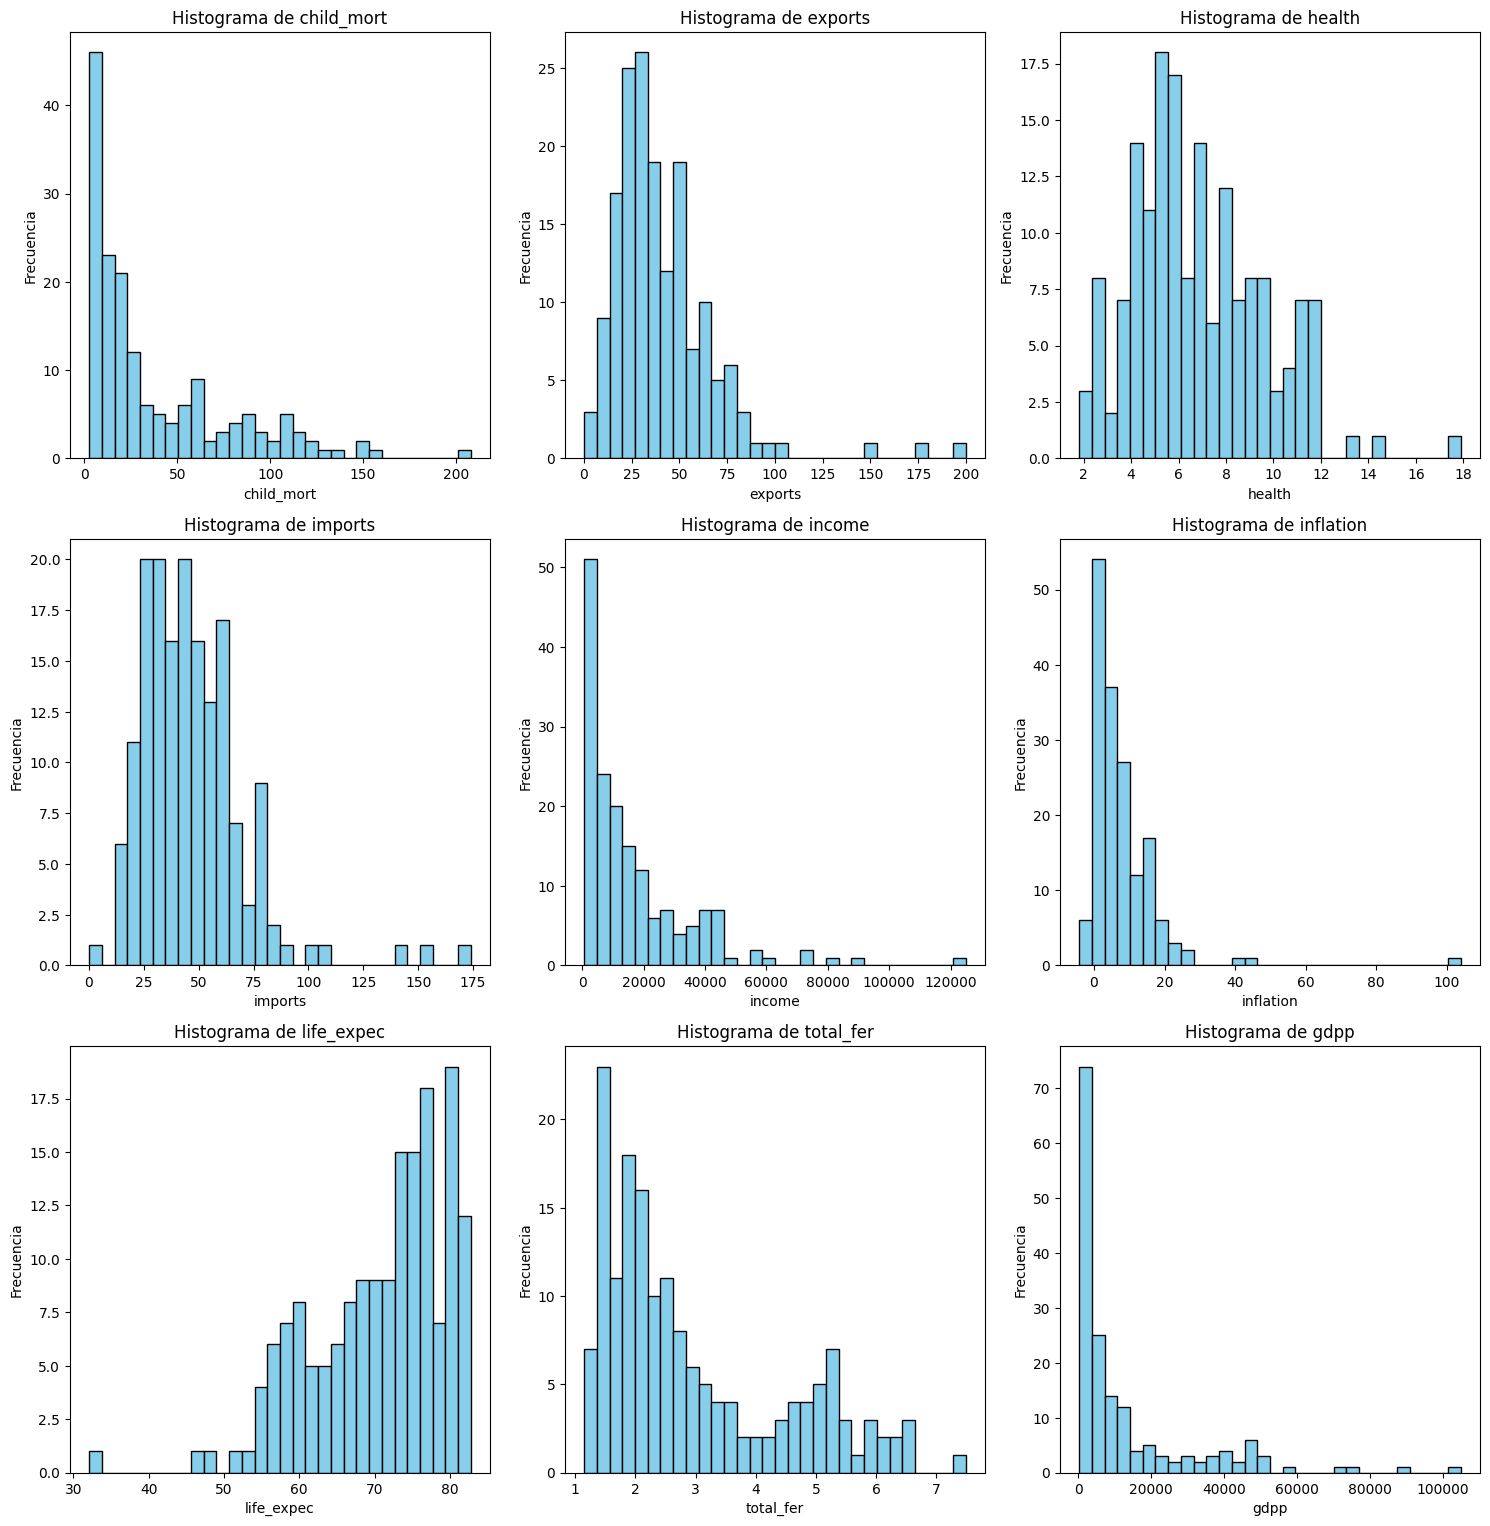

In [6]:
# Crear una figura con subplots
num_vars = len(df_num.columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, 5 * ((num_vars // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    # Graficar el histograma
    axes[i].hist(df_num[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes sobrantes si hay menos de 3 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

Una vez analizadas las distribuciones, que vemos que todo cuadra con lo esperado, vamos a analizar las relaciones entre nuestras variables. Para ello vamos a mostrar la matriz de correlación

<Axes: >

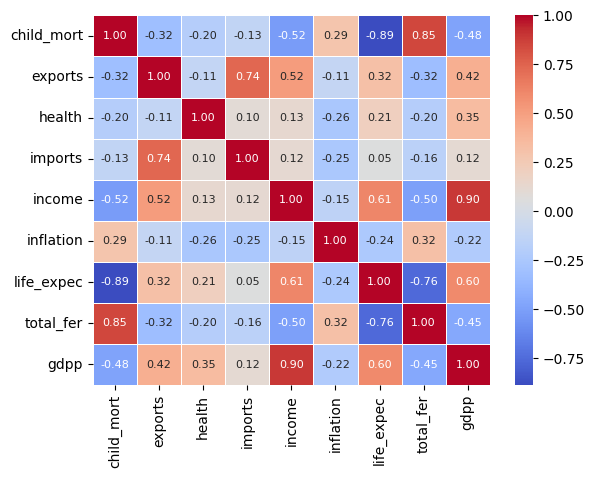

In [7]:
# Matrice de corrélation
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

En esta matriz podemos ver valores en un rango muy amplio del factor de correlación. Por ejemplo, tenemos variables muy correladas con relación directa como por ejemplo las importaciones (***imports***) y las exportaciones (***exports***) que presentan un factor de 0.74. No es el factor más alto que encontramos, el mayor valor de correlación directa sería entre ***income*** y ***gdpp*** con 0.90. Con una relació ninversa también encontramos altas correlaciones, por ejemplo entre la esperanza de vida (***life_expec***) y la mortalidad infantil (***child_mort***) con -0.89 de coeficiente. Son relaciones que la lógica nos hace ver una relación entre ellas y con estos valores tan altos, nos hacemos una idea de la fuerte correlación entre ellas.

Esta matriz será el punto de partida para nuestro analisis de componentes principales por lo que no debemos perderla de vista ya que todo se basa en ella. Ahora vamos a pintar gráficamente algunas de esas relaciones para ver como efectivamente están altamente correladas.

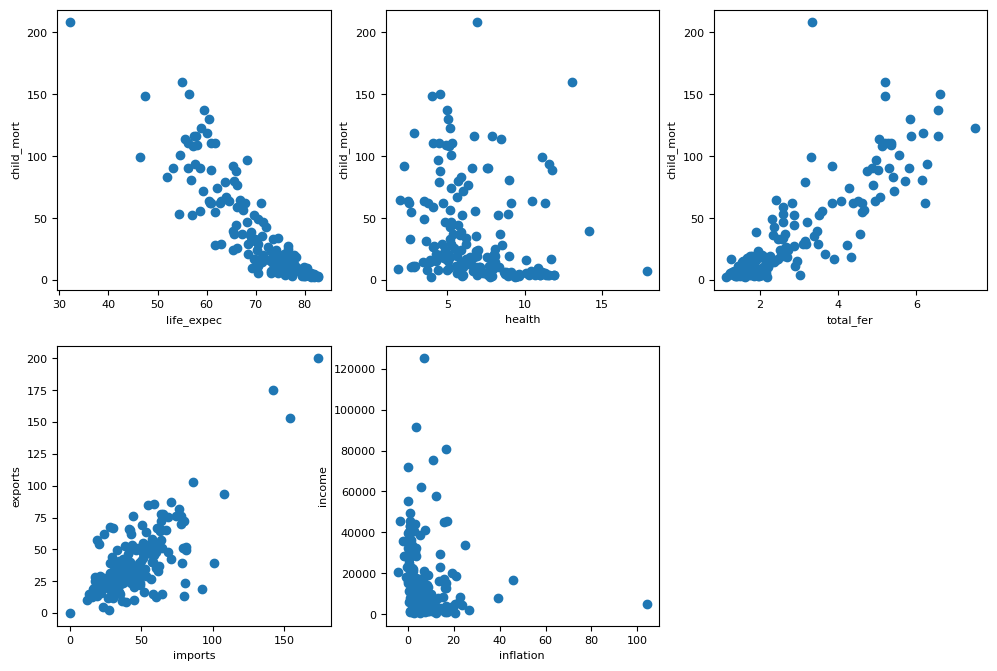

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(df_num.life_expec, df_num.child_mort)
plt.ylabel('child_mort', fontsize=8)
plt.xlabel('life_expec', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.subplot(2, 3, 2)
plt.scatter(df_num.health, df_num.child_mort)
plt.ylabel('child_mort', fontsize=8)
plt.xlabel('health', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.subplot(2, 3, 3)
plt.scatter(df_num.total_fer, df_num.child_mort)
plt.ylabel('child_mort', fontsize=8)
plt.xlabel('total_fer', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.subplot(2, 3, 4)
plt.scatter(df_num.imports, df_num.exports)
plt.ylabel('exports', fontsize=8)
plt.xlabel('imports', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.subplot(2, 3, 5)
plt.scatter(df_num.inflation, df_num.income)
plt.ylabel('income', fontsize=8)
plt.xlabel('inflation', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)


plt.show()

De estas gráficas, podemos ver que por ejemplo entre las variables ***chld_mort*** y ***life_expec***, todos los paises se sitúan en una linea recta de pendiente negativa y con un ángulo de -45 grados. Esto nos indica que cuanto mayor es la esperanza de vida, menor es la mortalidad infantil. Comparando la tasa de mortalidad infantil ***child_mort*** con l avariable ***health*** no vemos ninguna relación clara, lo que explica el coeficiente de correlación tan bajo (-0.20) entre ambas. Sin embargo entre ***child_mort*** y ***total_fer*** si que se ve una relación clara directa que justifica el coeficiente de 0.85. entre las ***imports*** y ***exports*** también vemos una clara relación directa y sin embargo entre la ***inflation*** y los ingresos ***income*** no se ve mucha relación como ya veiamos con un -0.15.

Ahora pasamos a estandarizar las variables ya que al hacerlo ponemos a todas ellas en el mismo rango de valores y evitamos que las distintas escalas perjudique el analisis. Para estandarizar simplemente cogemos todas nuestras variables numéricas y a cada una de ellas el restamos la media y dividimos entre la desviación estandar.

In [9]:
# estandarizamos las variables numericas
df_num = (df_num - df_num.mean()) / df_num.std()

Una vez estandarizados los datos vamos a realizar algunos tests para verificar si el analisis de componentes principales es ideneo para estos datos o no. En este sentido, viendo los datos de la matriz de correlación, todo apunta a que si puesto que tenemos muchas variables con correlaciones muy altas entre ellas. Esto es un síntoma importante de que nuestros datos tienen mucha variabilidad conjunta entre variables y por tanto, parece que podemos reducir componentes.

Vamos a realizar el test de Kaiser-Meyer-Olkin. Este test mide la relación entre la correlación de las variables y la suma de la correlación de las variables más la correlación directa de las variables descontando la correlación a través de otras variables. cuanto más cercano a 1, más idóneo es el analisis de componentes principales puesto que habrá mayor parte de la varianza de los datos explicada a partir de factores comunes. Si se acerca a cero, significa que tenemos ya factores independientes entre si y por tanto no merece la pena aplicar el analisis.

In [10]:
# Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_num)

# Mostrar el índice KMO general
print(f"Índice KMO (global): {kmo_model:.4f}")

# Mostrar el índice KMO por variable
print("Índices KMO por variable:")
print(kmo_all)
print(df_num.columns)

Índice KMO (global): 0.6779
Índices KMO por variable:
[0.73420341 0.56639045 0.36371698 0.41144285 0.69471161 0.74145094
 0.80359994 0.85862769 0.66306603]
Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


El resultado muestra un coeficiente de 0.68 que podríamos decir que está entre regular y aceptable. Por debajo de 0.6 sería demasiado pobre como para que merezca la pena y menor de 0.5 sería sin sentido. De entre las variables, las que más tiran hacia abajo el índice son variables como ***health*** o ***imports*** y ***exports***, que parece que no aportan mucha explicabilidad acerca del resto a través de factores comunes.

Ahora pasamos a realizar el test de Barlett. En este caso, a través de un test de hipótesis, valoramos si se cumple la hipotesis nula de que nuestra matriz de correlaciones es significativamente distinta de la matriz unidad. La matriz unidad es la matriz perfecta en cuanto a no correlación, ya que todas sus relaciones tienen correlación 0 salvo cada variable consigo misma. Si el test determina que el p-valor está por debajo de 0.05, la matriz es significativamente distinta que la matriz unidad y por tanto se puede determinar que hay factores comunes y por tanto hay idoneidad para el analisis de componentes.

In [11]:
# Realizar el test de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df_num)

# Mostrar resultados
print(f"Valor de chi-cuadrado: {chi_square_value:.4f}")
print(f"p-valor: {p_value:.4f}")

Valor de chi-cuadrado: 1169.7372
p-valor: 0.0000


El p-valor de la prueba sale muy por debajo de 0.05 por lo que nuestros datos, en base a este test, son adecuados para el analisis. En resumen, las 3 vías exploradas determinan que nuestros datos son carne de cañón para un analisis de componentes principales.

Por ello, pasamos directamente a crear el modelo y lo ajustamos con nuestros datos.

In [12]:
# Crear un modelo de componentes principales ajustado a los datos númericos
pca = PCA()
pca.fit(df_num)

PCA()

Para realizar el analisis lo primero que es calcular los autovectores y autovalores. Los recogemos y los almacenamos en variables para utilizarlos después. También le pedimos al modelo que nos devuelva los autovalores en porcentaje respecto de todos ellos.

In [13]:
# Recuperamos la información de autovalores y autovectores
explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
autovectores = pca.components_

Los autovalores de la matriz de correlación, son la varianza explicada de los datos sobre la componente correspondiente. Por ello es relevante este dato ya que nos servirá para determinar cuales son las más importantes de entre las componentes obtenidas. Por otro lado, los autovectores son las componentes. Al final son vectores cuya dimension está basada en el espacio de variables original y muestran la dirección de cada componente principal. Con cada autovalor tenemos un autovector asociado. Uno marca la dirección y el otro la calidad de dicha dirección.

Metemos en un dataframe los resultados e interpretamos también la varianza explicada acumulada en porcentaje.

In [14]:
df_pca_results = pd.DataFrame({
    'Componente':np.array(range(pca.n_components_)), 
    'Explained Variance':explained_var, 
    'Explained Variance Ratio':explained_var_ratio
})

# Agregar la columna con la suma acumulada del ratio
df_pca_results['Cumulative Explained Variance Ratio (%)'] = 100*df_pca_results['Explained Variance Ratio'].cumsum()
df_pca_results

,Componente,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance Ratio (%)
0,0,4.135657,0.459517,45.951740
1,1,1.546346,0.171816,63.133365
2,2,1.170383,0.130043,76.137624
3,3,0.994785,0.110532,87.190786
4,4,0.660619,0.073402,94.530998
5,5,0.223581,0.024842,97.015232
6,6,0.113439,0.012604,98.275663
7,7,0.088315,0.009813,99.256944
8,8,0.066875,0.007431,100.000000


Este dataframe nos muestra cada componente que el modelo nos ha generado. Cada una tiene un autovalor asociado que sería la varianza explicada de los datos sobre ducha componente, y también se muestra el porcentaje que supone cada una sobre el total de varianza explicada por todas estas componentes. Por último se muestra, al tener ordenados de mayor a menor varianza explicada, la suma acumulada de los porcentajes.

De esta forma, podemos ver de forma muy sencilla, cuántas componentes tenemos que utilizar para, al menos, explicar el porcentaje mínimo que exijamos. Si por ejemplo imponemos que como mínimo expliquemos el 80% de la varianza, entonces no squedaríamos con las 4 primeras componentes (componentes de 0 a 3) ya que entre las 4 se explica un 87% de la variabilidad conjunta de los datos.

Vamos a mostrar esta información gráficamente:

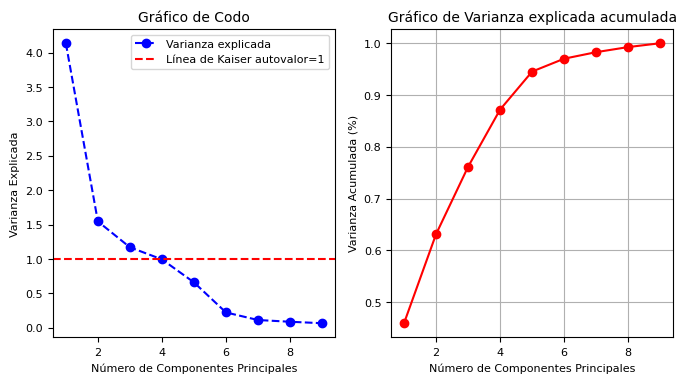

In [15]:
plt.figure(figsize=(8, 4))

# Varianza explicada por cada componente
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', color='b', label='Varianza explicada')
plt.axhline(y=1, color='r', linestyle='--', label='Línea de Kaiser autovalor=1')
plt.title('Gráfico de Codo', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Varianza Explicada', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

# Varianza explicada acumulada
plt.subplot(1, 2, 2)
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='r', label='Varianza explicada acumulada')
plt.title('Gráfico de Varianza explicada acumulada', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Varianza Acumulada (%)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Mostrar el gráfico
plt.grid(True)
plt.show()

La primera gráifica ilustra ordenando las componentes de mayor a menor explicabilidad conjunta de los datos, como va descendiendo el nivel de explicabilidad que aportan las componentes. La idea de esta gráfica es encontrar un número de componentes a partir del cual, añadir una componente más no aporta mucho y no merece la pena. Según el criterio del codo, cuando la gráfica se tumba y hace una forma de codo, en esa especie de intersección puede ser un buen punto puesto que se tumba mucho hacia la derecha y con cada paso, se avanza poco. En este caso, la gráfica tiene una forma un tanto extraña pero se puede ver que en 3 componentes deja de haber un salto significativo con la siguiente. No hay mucha didrencia entre coger 3 o 4 y con 3, tienes una variable menos para tu modelo.

El criterio de Kaisser dice que lo suyo es quedarse con componentes que tengan una varianza explicada de como minimo 1. Este valor 1 viene a decir que esa componente explica lo equivalente a una de las variables originales. Si tiene menos de eso, sería una componente que no merece la pena puesto que no reduce la dimensionalidad sino que la aumenta ya que para explicar lo mismo necesitas más componentes que una original. En este sentido, nuestra gráfica nos muestra que tenemos 3 componentes por encima de 1, por lo que parece el número más adecuado.

La otra gráfica muestra la varianza explicada acumulada. Al igual que hicimos utilizando la tabla, la idea es quedarnos con el número de variables que alcancen un mínimo de varianza explicada. Un valor habitual suele ser 80% por lo que en nuestros datos, si cogemos 3 componentes tenemos un 76% y si cogemos 4 tenemos un 87%. En nuestro caso vamos a quedarnos con 3 componentes de forma que alcanzamos casi el 80% de la varianza conjunta explicada y reduce mucho la dimensionalidad de los datos.

El siguiente paso es calcular la matriz que nos permitirá proyectar los datos a las componentes elegidas. Esta matriz se calcula como la matríz formada por los autovectores escogidos multiplicado por la raíz cuadrada de la matriz diagonal de autovalores. Los valores de la matriz resultante son los coeficientes de saturación o cargas.

In [16]:
# Construimos matriz de autovectores seleccionados
V123 = pd.DataFrame((autovectores[0], autovectores[1], autovectores[2])) .T

# Proyección de variables sobre las 3 componentes (matriz L)
proyected_matrix = V123 * (explained_var[:3]**0.5)
proyected_matrix.set_index(df_num.columns, inplace=True)
proyected_matrix.columns = ['Comp_1', 'Comp_2', 'Comp_3']

# Mostrar tabla
proyected_matrix

,Comp_1,Comp_2,Comp_3
child_mort,-0.853148,0.239855,-0.031961
exports,0.577342,0.762482,0.156608
health,0.306749,-0.302284,-0.645462
imports,0.328396,0.835424,-0.324474
income,0.810282,0.028023,0.326227
inflation,-0.392843,-0.010451,0.695105
life_expec,0.866000,-0.276941,0.123242
total_fer,-0.821036,0.193036,0.021149
gdpp,0.798495,-0.057230,0.133042


Gracias a estos coeficientes podemos entender cada una de las componentes seleccionadas, qué relación tienen con las variables originales. Por ejemplo, en la componente 1 tienen mucho peso variables como ***child_mort*** con un coeficiente de -0.85, ***income*** con 0.81, ***life_expec*** con 0.86, ***total_fer*** con -0.82 y ***gdpp*** con 0.798. La componente 2 se ve más influenciada por ***imports*** y ***exports*** y la compoenente 3 por ***health*** e ***inflation***.

Ahora vamos a proyectar los datos sobre las nuevas componentes seleccionadas. Para eso vamos a multiplicar la matriz de datos por la matriz de autovectores.

In [17]:
# Proyectar los datos originales sobre las nuevas componentes (matriz Z)
proyected_data = df_num @ np.array(V123).reshape(9, 3)
proyected_data.set_index(data.country, inplace=True)
proyected_data.columns = ['Comp_1', 'Comp_2', 'Comp_3']

# Mostrar datos proyectados
proyected_data.head()

,Comp_1,Comp_2,Comp_3
country,,,
Afghanistan,-2.904290,0.095334,-0.715965
Albania,0.428622,-0.586392,-0.332486
Algeria,-0.284370,-0.453810,1.217842
Angola,-2.923630,1.690471,1.520471
Antigua and Barbuda,1.030477,0.136249,-0.225044


La matriz que da como resultado esta proyección se trata de una matriz donde cada fila es un país al igual que nuestros datos originales, pero tan solo tenemos 3 componentes, las 3 componentes principales que hemos escogido. Cada celda de la matriz es el valor proyectado sobre estas nuevas componentes de los valores originales estandarizados.

Vaoms a pintar en un gráfico las variables originales en el espacio vectorial de nuestras nuevas componentes. Para hacer la visualización más sencilla, vamos a pintar sobre el espacio vectorial 2D formado por la componente 1 y la 2, las variables originales como flechas. La dirección y el valor absoluto de cada una de las componentes, determinan la relación que tiene la variable original con cada una de las componentes principales.

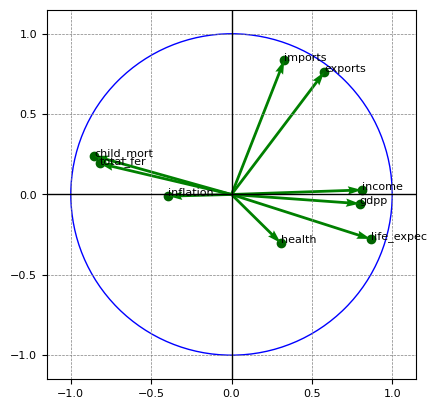

In [18]:
# Crear figura y eje
fig, ax = plt.subplots()

# Pintamos un circulo de radio 1
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

# Pintamos los puntos de los vectores de las variables según las saturaciones
plt.scatter(proyected_matrix['Comp_1'], proyected_matrix['Comp_2'], color='darkgreen')

# Añadir etiquetas a cada vector
for i in proyected_matrix.index:
    plt.text(proyected_matrix['Comp_1'][i], proyected_matrix['Comp_2'][i], str(i), fontsize=8, ha='left')

# Añadir las fechas de los vectores
for i in proyected_matrix.index:
    ax.quiver(0, 0, proyected_matrix['Comp_1'][i], proyected_matrix['Comp_2'][i],
              angles='xy', scale_units='xy', scale=1, color='green', linewidth=0.3)

ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(-1.15, 1.15)

# Asegurar relación de aspecto entre ejes de componentes 1 y 2
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

En este caso podemos ver que tenemospor ejemplo las variables ***income*** y ***gdpp*** que prácticamente son la misma flecha de lo cerca que están la una de la otra y están casi en la misma dirección que una de las 2 componentes (la componente 1), la que sería equivalente al eje x. Estas variables están por tanto muy representadas en la nueva componente 1. Es importante el circulo unitario pintado al rededor ya que estos vectores tienen módulo 1 como máximo y por tanto no pueden sobrepasarlos. Como aquí representamos solo 2 componentes, el caso por ejemplo de la variable ***inflation***, no podemos decir que esté muy relacionada con esta componente a pesar de que en este espacio parece que solo tiene componente 1. Como faltan otras componentes, la componente 3, puede que tenga mucho más peso que la 1. Además el módulo de esta parece que no alcanza ni la mitad del radio del circulo, por lo que no es muy potente la relación. También representadas con mucha fuerza en esta componente 1, tenemos las variables ***life_expec***, ***child_mort*** y ***total_fer***. Las 2 últimas están muy estrechamente ligadas entre sí dado que tienen prácticamente la misma flecha. Estas 3 variables tienen casi módulo 1 al igual que ***income*** y ***gdpp***, y por tanto su relación con la componente 1 es casi total.

Luego está el caso de ***imports*** y ***exports*** que prácticamente tienen módulo 1 pero con una componente 2 (eje y) muy elevada, lo que las relaciona estrechamente con esa componente en especial. Por último, ***health*** que al igual que ***inflation***, no parece haber mucha fuera en la relación con la componente 1 ni la 2. Quizá tengan más con la componente 3.

Vamos a ver el mismo diagrama pero con la componente 2 y 3

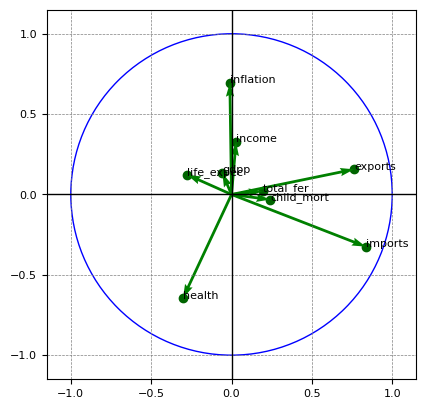

In [19]:
# Crear figura y eje
fig, ax = plt.subplots()

# Pintamos un circulo de radio 1
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

# Pintamos los puntos de los vectores de las variables según las saturaciones
plt.scatter(proyected_matrix['Comp_2'], proyected_matrix['Comp_3'], color='darkgreen')

# Añadir etiquetas a cada vector
for i in proyected_matrix.index:
    plt.text(proyected_matrix['Comp_2'][i], proyected_matrix['Comp_3'][i], str(i), fontsize=8, ha='left')

# Añadir las fechas de los vectores
for i in proyected_matrix.index:
    ax.quiver(0, 0, proyected_matrix['Comp_2'][i], proyected_matrix['Comp_3'][i],
              angles='xy', scale_units='xy', scale=1, color='green', linewidth=0.3)

ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(-1.15, 1.15)

# Asegurar relación de aspecto entre ejes de componentes 1 y 2
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Aquí la cosa se ve más apretujada en el centro. Todas aquellas variables que vimos antes que tenían una relación muy estrecha con la componente 1, ahora tienen un módulo muy pequeño y por tanto poca relación con las componentes 2 y 3 que se visualizan aquí. Sin embargo, ***imports*** y ***exports*** como bien sabíamos de la gráfica anterior, tienen una relación enorme con la componente 2 que en esta gráfica sería el eje x. Ambas conservan un modulo muy cercano al círculo unitario. Las flechas de ***inflation*** y ***health*** han cogido algo más de tamaño, especialmente en la dirección de la componente 3 (eje y). No es para tirar cohetes pero parece que tienen más relación con esa componente que con la 1 o la 2.

Por último vamos a ver el espacio compuesto por la componente 1 y la 3

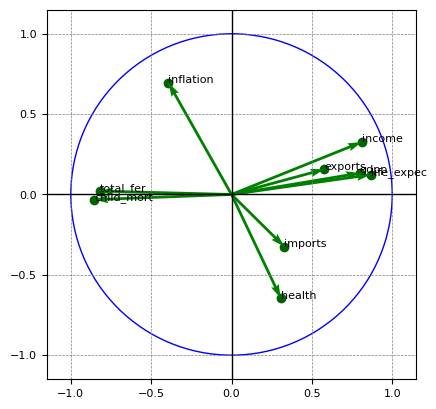

In [20]:
# Crear figura y eje
fig, ax = plt.subplots()

# Pintamos un circulo de radio 1
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

# Pintamos los puntos de los vectores de las variables según las saturaciones
plt.scatter(proyected_matrix['Comp_1'], proyected_matrix['Comp_3'], color='darkgreen')

# Añadir etiquetas a cada vector
for i in proyected_matrix.index:
    plt.text(proyected_matrix['Comp_1'][i], proyected_matrix['Comp_3'][i], str(i), fontsize=8, ha='left')

# Añadir las fechas de los vectores
for i in proyected_matrix.index:
    ax.quiver(0, 0, proyected_matrix['Comp_1'][i], proyected_matrix['Comp_3'][i],
              angles='xy', scale_units='xy', scale=1, color='green', linewidth=0.3)

ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(-1.15, 1.15)

# Asegurar relación de aspecto entre ejes de componentes 1 y 2
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Auí al volver a tener la componente 1, vemos la enorme relación que tienen las variable de antes con la componente 1 y vemos que por ejemplo el módulo de la variable ***inflation*** se acerca mucho a 1. También la de ***health*** se acerca mucho al 1. Esto es porque su composición está repartida entre la componente 1 y la 3, aunque quizá con más de la 3 que de la 1.

Una vez hecho el analisis de componentes, haber elegido un conjunto de 3 componentes para representar las variables originales, haber analizado las cargas de cada variable y después de proyectar los datos sobre el nuevo espacio de componentes vamos a proceder a realizar un analisis con un enfoque distinto, un analisis factorial.


### 2. Analisis Factorial (AF) ###

El analisis factorial, a diferencia del analisis de componentes principales, no busca tanto la reducción de la dimensionalidad y máximizar la varianza conjunta explicada sobre dichas componentes, sino más bien la busqueda e interpretación de factores latentes.

Este analisis parte del mismo punto de inicio que el analisis de componentes, es más, el propio analisis de componentes suele ser uno de los métodos que se utilizan para obtener los factores del analisis factorial.

El primer paso es la elección del número de factores. Al igual que hicimos en el analisis de componentes principales, obtenemos a partir de los autovectores y autovalores, las componentes principales con sus autovalores que explican la varianza conjunta de las variables. Con los mismos criterios que con el otro, seleccionamos las componentes más apropiadas. Podemos usar Kasier-Meyer-Olkin o la grafica de codo por ejemplo. Con esos criterios elegimos el numero de componentes apropiado y éstas pasarán a ser nuestros factores en el analisis factorial.

Vamos a realizar el analisis indicandole 3 factores. Le pasamos los datos y lo ajustamos a ellos. El modelo factorial nos devuelve las componentes como vectores formados por las cargas factoriales. 

In [21]:
# Realizar el análisis factorial
n_factores = 3  # Decidido tras el análisis PCA
fa = FactorAnalysis(n_components=n_factores, random_state=42)

# Ajustar el modelo a los datos originales
fa.fit(df_num)

# Obtener los factores (componentes) o cargas factoriales de cada variable
cargas_factoriales = fa.components_

# Crear un DataFrame con las cargas factoriales
# Las filas corresponden a los factores, las columnas a las variables originales
df_cargasFact = pd.DataFrame(cargas_factoriales.T, columns=[f'Comp_{i+1}' for i in range(n_factores)], index=df_num.columns)

# Mostrar los factores extraídos
df_cargasFact

,Comp_1,Comp_2,Comp_3
child_mort,-0.746365,0.603161,0.246478
exports,0.826063,0.539899,-0.102683
health,0.107633,-0.312348,0.287944
imports,0.512694,0.524483,-0.238627
income,0.762322,-0.123183,0.494542
inflation,-0.246561,0.172518,-0.006169
life_expec,0.730130,-0.542832,-0.034804
total_fer,-0.679214,0.483614,0.180840
gdpp,0.708954,-0.188231,0.659459


A partir de las cargas factoriales podemos entender la composición de los factores. Por ejemplo en este caso tenemos que el factor 1 está muy vinculado a las variables ***child_mort***, ***exports***, ***income***, ***life_expec***, ***total_fer*** y ***gdpp***. Es una conclusión a la que ya habíamos llegado en el analisis de componentes principales. Aquí al igual que entonces, todas las variables tenían cierta influencia en cada factor. Unas más fuertemente en unos factores y otras en menor medida pero también. Esto de alguna forma dificulta, no tanto la selección de variables para reducir la dimensionalidad, si no la interpretabilidad de los factores. No parece que haya algo claro que determine factores latentes. O al menos de una forma obvia.

Vamos a mostrar los datos de una forma más colorida a ver si eso nos ayuda algo más a entender los factores latentes.

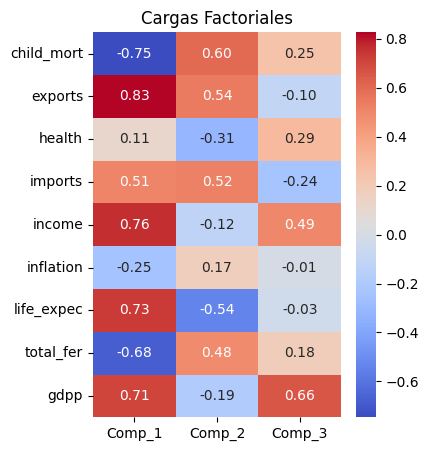

In [22]:
# Visualizar el DataFrame con un heatmap
plt.figure(figsize=(4, 5))
sns.heatmap(df_cargasFact, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cargas Factoriales')
plt.show()

Analizando esta gráfica, vemos lo mismo y como mucho vemos con algo más de claridad que el factor 3 tiene relación únicamente con el ***gdpp*** y el ***income*** pero claro, ambas tienen también mucho que decir en el factor 1. Y en el factor 2, no son grandes cargas factoriales que puedan dar un gran peso a un factor latente. El máximo valor es la variable ***child_mort*** que parece tener una relación fuerte (auqneu no tanto como el factor 1) con el factor 2 y en este caso una relación directa cuando en el factor 1 era inversa. 

Vamos a analizar las comunalidades y unicidades a ver si nos arroja algo más de luz sobre los factores que estamos analizando.

In [23]:
# Crear un DataFrame con las cargas factoriales
df_cargas = pd.DataFrame(cargas_factoriales, columns=df_num.columns, index=[f'Comp_{i+1}' for i in range(n_factores)])

# Calcular las comunalidades (suma de los cuadrados de las cargas factoriales por variable)
comunalidades = np.sum(df_cargas**2, axis=0)

# Calcular la unicidad (1 - comunalidad)
unicidad = 1 - comunalidades

# Crear un DataFrame con las comunalidades y unicidades
df_comunalidades_unicidad = pd.DataFrame({
    'Comunalidad (%)': 100*comunalidades,
    'Unicidad (%)': 100*unicidad
})

# Mostrar la tabla
df_comunalidades_unicidad

,Comunalidad (%),Unicidad (%)
child_mort,98.161558,1.838442
exports,98.441511,1.558489
health,19.205843,80.794157
imports,59.487945,40.512055
income,84.088020,15.911980
inflation,9.059284,90.940716
life_expec,82.896758,17.103242
total_fer,72.791636,27.208364
gdpp,97.293343,2.706657


Gracias al analisis de comunalidades y unicidad, vemos cosas interesantes como que por ejemplo tenemos variables como ***child_mort***, ***exports*** o ***gdpp*** que tienen un porcentaje de comunalidad superior al 97%. Esto significa que estas variables están siendo explicadas por los factores de forma conjunta en esos porcentajes. Es decir, que en cada una de ellas, tan solo queda un 1%-2% de variabilidad sin explicar de forma conjunta y que se explique por si mismas.

Luego tenemos casos como el de ***health*** o ***inflation*** que la verdad que no son explicadas para nada a partir de las demás variables de forma conjunta. Son independientes respecto de las demás variables. Tienen un porcentaje de 19% y 0% de comunalidad respectivamente.

El resto, bueno, unas más otras menos, pero acaban teniendo bastante explicabilidad a partir del conjunto.

Ahora vamos a intentar aplicar una rotación a ver si conseguimos un poco más de interpretabilidad con unos factores que expliquen mejor factores latentes. Aplicamos la rotación varimax que lo que hará será maximizar la varianza de cada factor a partir de variables más concretas que solo afecten a ficho factor.

In [24]:
# Aplicar rotación Varimax
fa_rotado = FactorAnalyzer(n_factors=3, rotation="varimax")
fa_rotado.fit(df_num)

# Obtener las cargas factoriales rotadas
cargas_factoriales_rotadas = fa_rotado.loadings_

# Mostrar las cargas factoriales rotadas en un DataFrame
df_cargas_rotadas = pd.DataFrame(cargas_factoriales_rotadas, columns=[f'Factor {i+1}' for i in range(3)], index=df_num.columns)

# Mostrar el resultado
df_cargas_rotadas

C:\Users\Carlos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor 1,Factor 2,Factor 3
child_mort,0.951604,-0.225821,-0.097430
exports,-0.152854,0.276686,0.953803
health,-0.202813,0.194463,-0.073813
imports,-0.084102,-0.028781,0.760626
income,-0.327698,0.814481,0.217443
inflation,0.300489,-0.080997,-0.127080
life_expec,-0.807178,0.400275,0.050648
total_fer,0.829229,-0.226733,-0.136404
gdpp,-0.280814,0.954069,0.127371


Al aplicar la rotación se ven cosas interesantes que han cambiado. Por ejemplo, ahora nuestro factor 1 tiene unas cargas factoriales con las variables ***child_mort***, ***life_expec*** y ***total_fer***. Esta vez solo estas 3 ya que las demás se ven muy reducidas respecto las cargas originales.

Veamos las mejor en un gráfico más colorido.

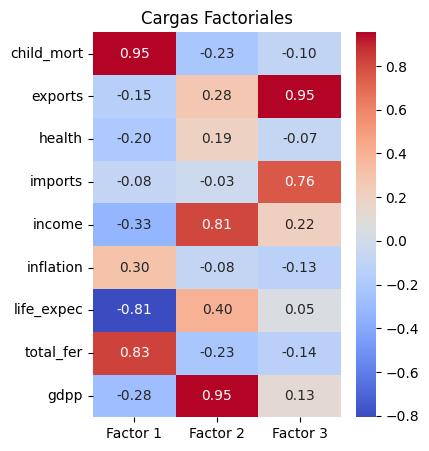

In [25]:
# Visualizar el DataFrame con un heatmap
plt.figure(figsize=(4, 5))
sns.heatmap(df_cargas_rotadas, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cargas Factoriales')
plt.show()

Efecticamente, tras rotar los factores, hemos hecho más extremas y concretas las relaciones de variables con factores. Ahora casi todas las variables tienen relación fuerte con un factor y baja con el resto. Por ejemplo, ***child_mort*** tiene un coeficiente de 0.95 con el factor 1 pero casi nada con los otros 2.

De aquí ya extraemos cosas muy intersantes. Por ejemplo, el factor 1, se podría decir que se trata de un factor latente relacionado con factores sociales y demográficos. Tiene cargas factoriales muy altas con las variables ***child_mort***, ***life_expec*** y ***total_fer***. Las 3 nos hablan de mortalidad, esperanza de vida o fertilidad. Todos ellos temas sociales-demográficos. Es por tanto una componente de ese tipo.

Por otro lado, el factor 2, parece tener una lógica más económica, de medios económicos. Tanto del pais como de los ciudadanos. En este factor se identifican claramente las variables ***income*** y ***gdpp***. Es decir, indicadores de la bonanza del pais y de los habitantes. Por tanto un factor económico puro.

Por último, el factor 3 parece que está estrechamente ligado a ***exports*** e ***imports***. Es decir, un factor relacionado con la balanza comercial del pais, un tema más de comercio. Siendo un tema económico pero el factor 2 era más de riqueza y este de comercio, intercambio con el resto del mundo.

Con esto tenemos 3 factores muy claramente diferenciados, y que permanecían ocultos tras los datos. Nuestro analisis factorial los ha sacado a la luz y nos permite no solo utilizarlos como variables para un modelo donde la dimensionalidad es mucho menor, sino que además se pueden interpretar ahora que sabemos lo que hay detrás de ellos y por tanto el modelo no será tan desconocido para nosotros cuando intentemos interpretarlo.

Hay un par de variables ***health*** e ***inflation*** que se han quedado fuera, esto es por que no tienen impacto significativo en ninguo de los factores. Son variables que no tienen relación con el resto aquí presentes, pero que pueden aportar información útil para un modelo del tipo que sea. Es decir, no se deben deshechar, pero si evitar factorizar con ellas detro e incorporarlas directamente después

Vamos a probar con otra rotación a ver si cambia algo la cosa. Probamos con oblimin:

C:\Users\Carlos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


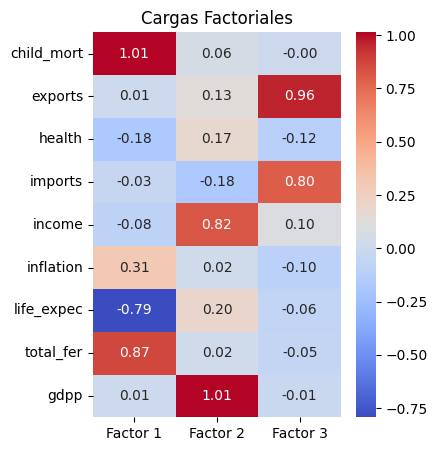

In [26]:
# Aplicar rotación Varimax
fa_rotado2 = FactorAnalyzer(n_factors=3, rotation="oblimin")
fa_rotado2.fit(df_num)

# Obtener las cargas factoriales rotadas
cargas_factoriales_rotadas2 = fa_rotado2.loadings_

# Mostrar las cargas factoriales rotadas en un DataFrame
df_cargas_rotadas2 = pd.DataFrame(cargas_factoriales_rotadas2, columns=[f'Factor {i+1}' for i in range(3)], index=df_num.columns)

# Visualizar el DataFrame con un heatmap
plt.figure(figsize=(4, 5))
sns.heatmap(df_cargas_rotadas2, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cargas Factoriales')
plt.show()

Como se puede ver, los factores se mantienen igual solo que un poco más extremos. No nos está aportando más información que la ue vemos y es la mnisma practicamente que con la varimax. No merece la pena cambiar de rotación.


### 3. Clustering de particionado ###

Vamos a saltar a otra parte de este ejercicio que consiste en la creación de un modelo de clustering capaz de segmentar mis datos de paises en grupos de acuerdo a criterios y patrones encontrados en nuestros datos.

Vamos a usar KMeans como algoritmo y servirá de ejemplo para ilustrar el funcionamiento de este tipo de algoritmos.

En primer lugar, dado que KMeans es un algoritmo que necesita que le indiquemos el numero de clusters en los que segmentar, vamos a proceder a crear un gráfico de codo que nos ayude a determinar cual es el número adecuado.

El gráfico de codo se genera a partir de varias iteraciones del propio algoritmo KMeans. Es decir, calcula una clusterización para 1 cluster, luego para 2 clusters, luego 3 y así sucesivamente hasta un número k. Una vez ha terminado todas las iteraciones, para cada modelo KMeans que ha ido ajustando, obtiene una métrica de distancia intra-cluster que nos da una referencia de lo cercanos que son los puntos de un cluster. Luego promedia esas métricas de todos los clusters que tenga y devuelve un valor. De esta forma, para cada iteración tenemos un resultado de esta métrica.

La gráfica de codo lo que hace es mostrar de izquierda a derecha como desciende la distancia intra-cluster conforme vamos haciendo más clusters. De esta forma si vamos agrupando, se supone que los puntos se agrupan por similitud y cercanía y, por tanto, va descendiendo la distancia. A esta métrica se llama inercia.

Al principio la distancia desciende rápidamente hasta un punto a partir del cual sigue descendiendo, pero a velocidad más lenta. Hasta un punto en que añadir un cluster más implica una reducción de la inercia o distancia muy pequeña. el punto en el que la velocidad de descenso cambia bruscamente, el codo de la gráfica, suele ser en el número de clusters más apropiado.

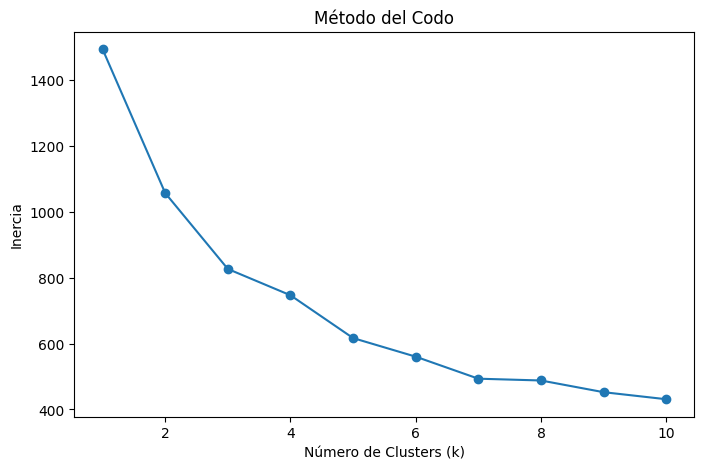

In [27]:
# Calcular el valor de inercia para diferentes valores de k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_num)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

El gráfico de codo no es que sea muy clarificador. No tiene un codo muy marcado y por ello cuesta distinguir un punto adecuado. En su lugar podemos intuir que el codo debe estar entre 3 y 6 clusters.

Vaoms a añadir algo mas de información para tratar de seleccionar mejor el número de clusters. Para ello vamos a utilizar una gráfica similar, conocida como silhouette scores. A diferencia de la anterior de inercia que mostraba la distancia intra-cluster, el silhouette score combina la distancia intra-cluster y la distancia inter-cluster. De esta forma, con un rango entre -1 y 1, siendo 1 un valor óptimo de definición de clusters y -1, una muy mala agrupación. Al combinar ambas métricas, es más completa ya que por un lado puntúa que estén muy cercanos entre sí los puntos de un cluster y por otro lado puntúa también que estén muy alejados de los demás clusters. Ambas perspectivas son necesarias y deseables.

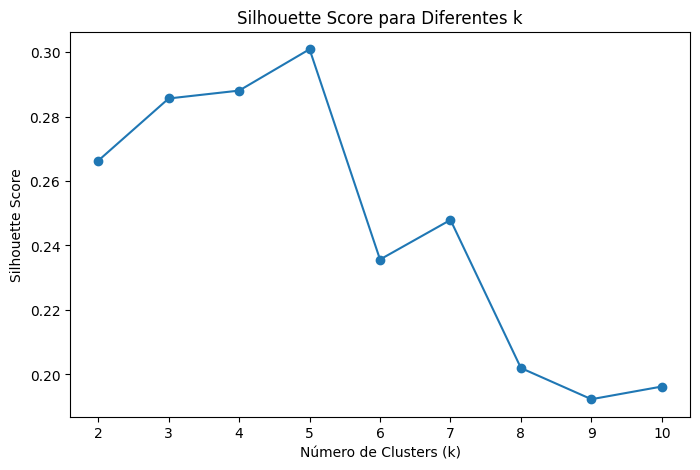

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette no es válido para k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_num)
    score = silhouette_score(df_num, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el silhouette score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score para Diferentes k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Viendo la gráfica, podemos ver que los valores más altos de esta métrica, sin ser la bomba, se encuentran en 3, 4 y 5 clusters con el pico más alto en 5 y destacado. Por lo que tendría más sentido escoger 5 clusters. Aun así, vamos a empezar con 3 clusters y así vemos diferencias:

In [29]:
# Elegir el número de clusters
k = 3 

# Aplicar k-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_num)

# Obtener los resultados
labels = kmeans.labels_  # Etiquetas asignadas a cada punto
centroids = kmeans.cluster_centers_  # Centroides de los clusters

# Agregar las etiquetas al DataFrame original (opcional)
df_num['Cluster'] = labels

Tras elegir los clusters hemos ajustado un modelo KMeans de 3 clusters a nuestros datos y hemos sacado las etiquetas por un lado y los centroides. Ahora vamos a hacer simplemente un recuento de los registros que han sido asignados a cada cluster.

In [34]:
# Hacemos recuento de países por cada cluster
df_num['Cluster'].value_counts()

Cluster
0    86
2    45
1    36
Name: count, dtype: int64

El cluster 0 es un cluster con bastantes países en comparación con el cluster 1 por ejemplo que tiene solo 36. Vamos a profundizar un poco más en ellos. Para ello vamos a coger la variable ***Cluster*** que contiene las etiquetas de los clusters que hemos formado y vamos a añadirlas a una copia del dataframe original. Así podremos hacer cálculos y estadísticas por cluster a partir de los datos no estandarizados.

In [36]:
# Creamos una copia del dataframe original
data_copy = data.copy()

# le añadimos la variable Cluster
data_copy['Cluster'] = labels

Ahora si, sacamos unos números a ver que pinta tienen los grupos que hemos hecho:

In [39]:
# Calculamos para cada grupo los valores medios de cada variable
data_copy.drop(columns=['country'], inplace=False).groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111


Aquí ya se van viendo cosas interesantes. Por lo pronto, el cluster 2 aglutina 45 países con una media de ***child_mort*** de 95. Es claramente el valor más alto de los 3 clusters con diferencia. Parece por tanto que ha sido una métrica importante a la hora de establacer la división de los puntos en grupos. En la misma línea, si seguimos analizando las demás variables poniendo foco en el cluster 2, vemos que por ejemplo el porcentaje de exportaciones (***exports***) es el más bajo de entre los 3 grupos aunque no difieren demasiado entre si. El nivel de renta o ingresos (***income***) se destaca como el más bajo de los 3 de forma clara. Los niveles de inflación también parece los más altos (***inflation***) con un 12% de inflación interanual. En cuanto a la esperanza de vida, vemos que este grupo tiene la esperanza de vida (***life_expec***)más baja de los 3 con solo 59 años. La variable ***total_fer*** tiene el valor más alto de entre las 3 indicando un número medio de hijos muy elevado. Por último, el ***gdpp*** (producto interior bruto) se destaca como el más bajo de todos. Por otro lado, vemos que a nivel de salud (***health***) no se muestran diferencias entre los 3 grupos, no se ha tenido mucho en cuenta esta variable para ello. Lo mismo sucede con las ***imports***. Claramente el cluster 2, a partir de nuestros datos, agrupa aquellos paises que podríamos decir en vías de desarrollo o emergentes. Son paises economicamente deprimidos, con unos niveles demográficos propios de países en desarrollo.

Si nos fijamos ahora en el cluster 1, con 36 países, parece que incluyen los valores opuestos de las variables que hemos mencionado. Por ejemplo, si nos fijamos en las tasas de mortalidad infantil (***child_mort***), tenemos con diferencia la más baja de los 3 grupos con 5 niños de cada 1.000 frente a los 95 del cluster 2. En el resto de variables ocurre más o menos lo mismo, son todas lo contrario a lo que ocurre en el cluster 2. Podemos mencionar en especial el ***gdpp*** que se desmarca muchisimo de los valores de los otros grupos, y también el nivel de ingresos (***income***) que le pasa lo mismo.

Por otro lado, el cluster 0 se podría decir que es un termino medio en el que los 86 países que lo componen, se sitúan entre los otros 2 grupos en todos sus indicadores.

Esta clusterización lo que nos viene a decir es que separa países en base al desarrollo que tiene. Si todas las variables las compactasemos en un único factor al que llamasemos **nivel de desarrollo**, esta clusterización lo que hace es dividir los países entre grupos en base a ese indicador único. Se podría decir que le pone 2 umbrales y listo.

Veamos algunos ejemplos de países que forman parte de cada cluster

In [40]:
data_copy[data_copy['Cluster']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0


In [41]:
data_copy[data_copy['Cluster']==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1


In [53]:
data_copy[data_copy['Cluster']==2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2


Ahora vamos a pintar en un mapa los paises por colores según el cluster al que pertenece cada uno:

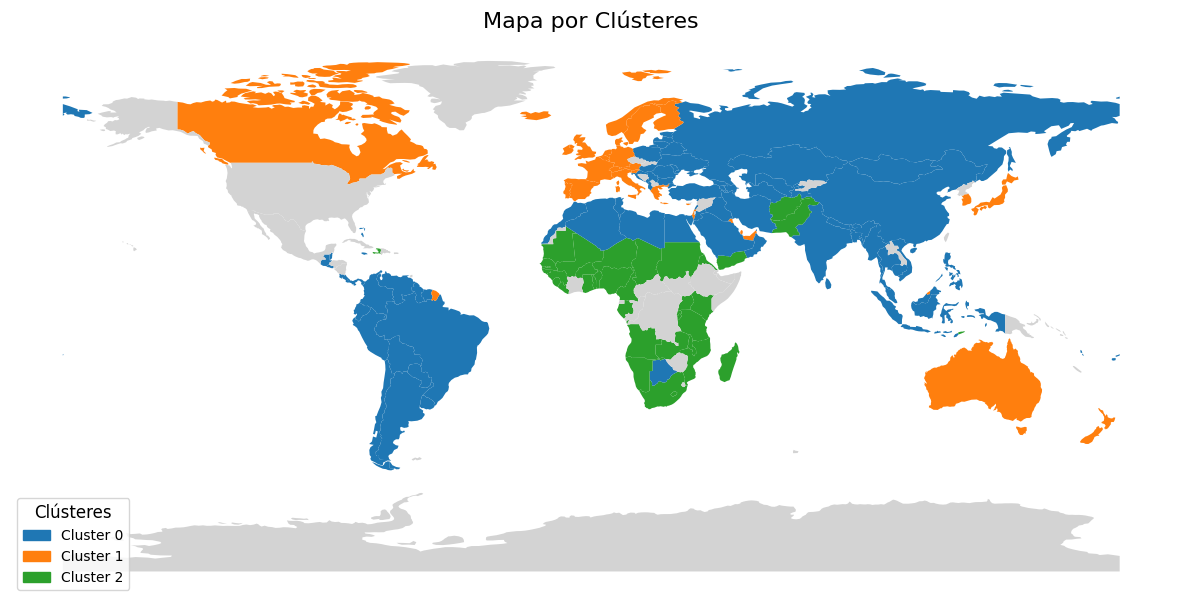

In [52]:
# Cargar el mapa base (geometría de los países)
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Unir los datos de clúster con el mapa base
world = world.merge(data_copy[['country','Cluster']], left_on='NAME', right_on='country', how='left')

# Definir una paleta de colores personalizada con 3 colores únicos
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])  # Ejemplo: azul, naranja, verde

# Crear el mapa coloreando por clúster
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster',  # Columna para colorear
           cmap=custom_cmap,  # Colores
           legend=False,       # Mostrar la leyenda
           ax=ax,             # Ejes para dibujar
           missing_kwds={"color": "lightgrey", "label": "Sin datos"}  # Países sin datos
           )
# Crear una leyenda personalizada
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
ax.legend(handles=legend_patches, title="Clústeres", loc='lower left', fontsize=10, title_fontsize=12)

# Personalizar el gráfico
ax.set_title('Mapa por Clústeres', fontsize=16)
ax.set_axis_off()  # Ocultar los ejes

plt.show()

Ahora vamos a probar a modificar el número de clusters. Vamos a probar con el valor que recomendaba la silhouette score que era 5.

In [54]:
# Elegir el número de clusters
k = 5 

# Aplicar k-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_num)

# Obtener los resultados
labels = kmeans.labels_  # Etiquetas asignadas a cada punto
centroids = kmeans.cluster_centers_  # Centroides de los clusters

# Agregar las etiquetas al DataFrame original (opcional)
df_num['Cluster'] = labels

In [55]:
# Hacemos recuento de países por cada cluster
df_num['Cluster'].value_counts()

Cluster
0    86
1    36
4    24
2    20
3     1
Name: count, dtype: int64

Según el recuento, ahora tenemos un cluster 0 con 86 países (exactamente igual que antes, habrá que ver si tiene las mismas características) y luego el resto se dividen en 4 clusters. Uno de ellos concretamente tiene un único pais. Veremos a ver qué tiene que le hace tan distinto del resto.

In [58]:
# le añadimos la variable Cluster
data_copy['Cluster'] = labels

In [59]:
# Calculamos para cada grupo los valores medios de cada variable
data_copy.drop(columns=['country'], inplace=False).groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.456977,40.273128,6.251047,47.362394,12321.744186,7.720884,72.566279,2.340349,6461.767442
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,118.895000,35.150000,5.658000,42.410000,3667.450000,10.673750,56.150000,5.524000,1788.000000
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,73.829167,23.283750,6.888333,43.258333,3366.416667,9.247083,61.416667,4.650833,1725.500000


Viendo los valores de los promedios, podemos extraer algunas conclusiones. Para empezar el cluster 0, no solo tiene el mismo número de países que en la clusterización anterior, sino que directamente son los mismos países. Por ello toda la fila de arriba es exactamente la misma. Este era el grupo intermedio, un grupo que, si entendemos que las variables en conjunto nos hablan sobre el desarrollo de un pais, todos estos están en una gran franja intermedia en la que no se destacan por ir a la cabeza del desarrollo pero tampoco a la cola.

De los 4 restantes, vamos primero con el cluster 1. Este cluster es idéntico al cluster 1 de antes. Pasa como con el 0, mismos países y por tanto mismos valores promedio. Este grupo contenía los 32 paises más a la cabeza en cuanto a desarrollo. Paises como EEUU, Australia o Canada.

La diferencia con la clusterización de 3 clusters viene por tanto en el cluster 2 de antes, que ahora se ha dividido en 3 clusters. Ese cluster se correspondía con los paises en vías de desarrollo. Vamos a analizar el caso concreto del cluster 3 que contiene un único país.

In [60]:
data_copy[data_copy['Cluster']==3].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,3


Parece que Nigeria tiene algo que no tienen los demás países en vías de desarrollo y por ello le han otorgado un cluster para él solo. Analizando un poco las variables vemos que por ejemplo se destaca con una mortalidad infantil de 130 lo cual indica que es muy elevada incluso dentro de este grupo de países en desarrollo. A pesar de tener semejante mortalidad infantil, los indicadores más correlados con éste como ***life_expec*** o ***total_fer*** no parecen tan extremos como lo era la ***child_mort***. También destaca en lo económico por tener una hiperinflación de 104 puntos interanuales. Un valor desorbitado. Y curiosamente tiene un producto interior bruto por encima de la media de los demás paises en desarrollo y unos ingresos tambien superiores. Estas contradicciones que rompen un poco el patrón que, por lo general, siguen estas variables, son los que hacen que este país haya quedado fuera con un cluster formado por sí mismo.

Los otros 2 grupos (cluster 2 y 4), ambos son 2 clusters prácticamente identicos salvo por la tasa de mortalidad. El cluster 2 tiene un promedio de 118 niños fallecidos al año de cada 1.000 mientras que el cluster 4 tiene 74.

Veamos en el mapa esta nueva forma de clusterizar cómo dsitribuye los países

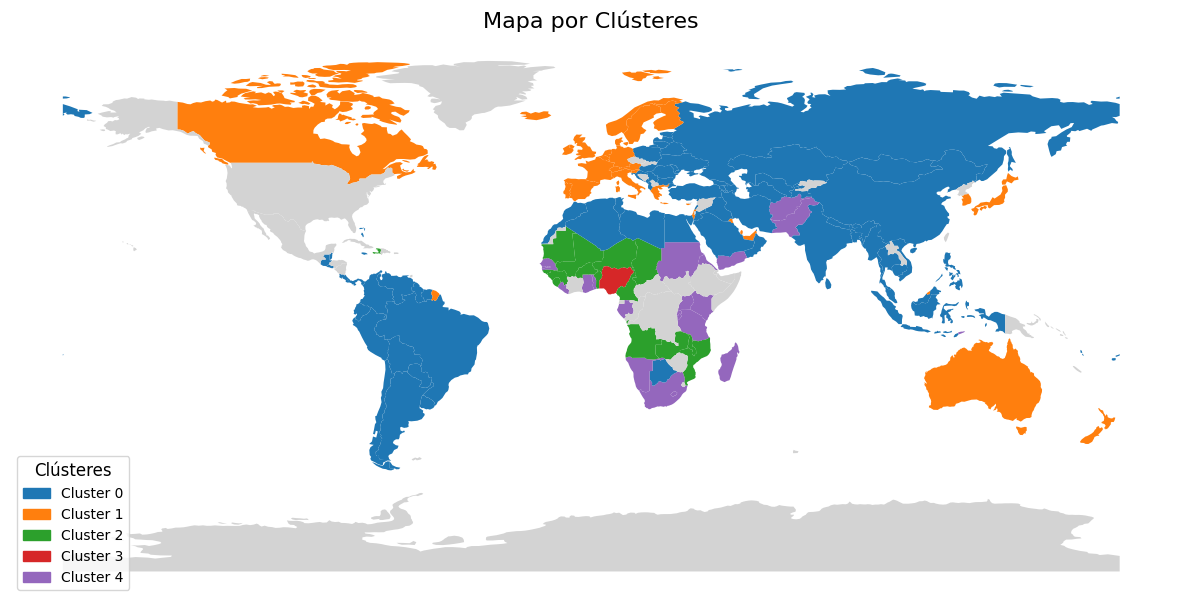

In [62]:
# Cargar el mapa base (geometría de los países)
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Unir los datos de clúster con el mapa base
world = world.merge(data_copy[['country','Cluster']], left_on='NAME', right_on='country', how='left')

# Definir una paleta de colores personalizada con 5 colores únicos
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])  # Ejemplo: azul, naranja, verde

# Crear el mapa coloreando por clúster
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster',  # Columna para colorear
           cmap=custom_cmap,  # Colores
           legend=False,       # Mostrar la leyenda
           ax=ax,             # Ejes para dibujar
           missing_kwds={"color": "lightgrey", "label": "Sin datos"}  # Países sin datos
           )
# Crear una leyenda personalizada
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
legend_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
ax.legend(handles=legend_patches, title="Clústeres", loc='lower left', fontsize=10, title_fontsize=12)

# Personalizar el gráfico
ax.set_title('Mapa por Clústeres', fontsize=16)
ax.set_axis_off()  # Ocultar los ejes

plt.show()

Como conclusión podemos ver que no hay una gran diferencia entre haber clusterizado en 3 clusters o 5 ya que se ha limitado a dividir uno de los 3 clusters en 3 y de ellos uno lo ha destinado a un país outlier y los otros 2 son prácticamente iguales salvo por la tasa de mortalidad. Esto último es lo único que aporta clusterizar en 5 frente a los 3 del inicio.


### 4. Clustering Jerarquico ###

El clustering jerarquico, a diferencia del clustering de particionamiento, no necesita de antemano que se le indique el número de clusters. En este caso, se lleva a cabo una serie de divisiones/agrupaciones de 1 a x clusters o viceversa y después nos quedamos con la partición que más nos gusta. No es muy distinto al final, ya que para elegir los de KMeans, a final lo que hemos hecho es generar para todos los clusters que se nos ocurra y quedarnos con el que más nos gusta.

Por tanto vamos a pasar directamente a realizar el clustering puesto que nuestros datos ya están preparados y no tenemos que entretenernos en elegir el número de clusters aún. Eso si, la función de enlace si que la tenemos que elegir antes, ya que va a ser quién determine cómo se llevará a cabo la fusión de clusters.

Empezamos por un enlace simple:

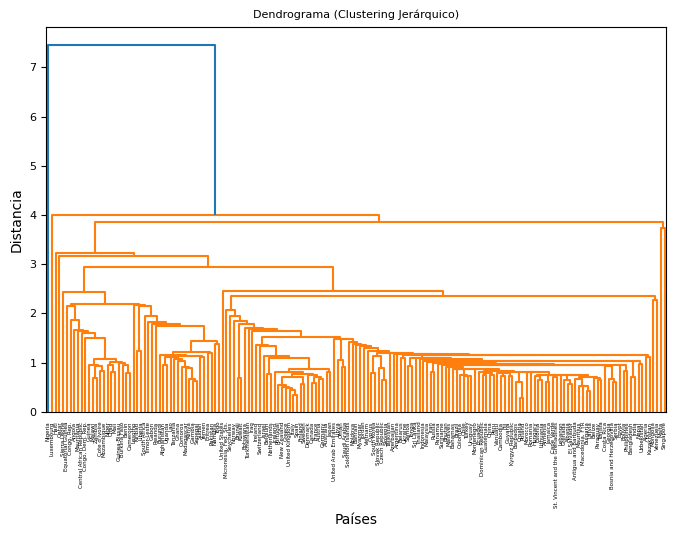

In [77]:
# Crear el dendrograma
linked = linkage(df_num, method='single')  # Método de enlace simple

plt.figure(figsize=(8, 5))
dendrogram(linked, labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title('Dendrograma (Clustering Jerárquico)', fontsize=8)
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.xticks(fontsize=4)
plt.yticks(fontsize=8)
plt.show()

En este tipo de enlace simple lo que se busca es ir fusionando los clusters más cercanos entre si, siendo la distancia entre ellos la distancia entre los puntos más cercanos de ambos clusters. Es un enfoque más agresivo en cuanto que basta con que haya un punto suficientemente cercano de algún punto del otro cluster. esto favorece la creacion de clusters más largos con formas ménos compactas. Aumenta la distancia intracluster.

En este caso, con el enlace simple, el propio dendograma nos aconseja agrupar en 2 clusters: uno que aglutina un único país, y luego el resto en otro grupo. No parece muy lógico este clustering. Más allá de la recomendación podemos seleccionar los que consideremos a la vista del dendograma y clusterizar en base a ello.

Vamos a probar a cortar el dendograma a partir de la distancia 3. Esto nos debería generar unos 6-7 clusters

In [82]:
# Determinar el corte en el dendrograma usando un umbral de distancia
threshold = 3 

# Crear los clústeres basados en el corte
clusters = fcluster(linked, threshold, criterion='distance')

# Agregar los clústeres al dataframe
data_copy['Cluster'] = clusters

In [83]:
# Hacemos recuento de países por cada cluster
data_copy['Cluster'].value_counts()

Cluster
1    161
3      1
6      1
4      1
7      1
2      1
5      1
Name: count, dtype: int64

Una vez clusterizado y distribuidos los datos por cluster, vemos que ha formado un grupo único con 161 registros y los 6 grupos restantes son de un único páis cada uno. No parece una clusterización muy coherente.

Vamos a probar una función de enlace completa. Este tipo de enlace es más conservador y consigue clusters más compactos.

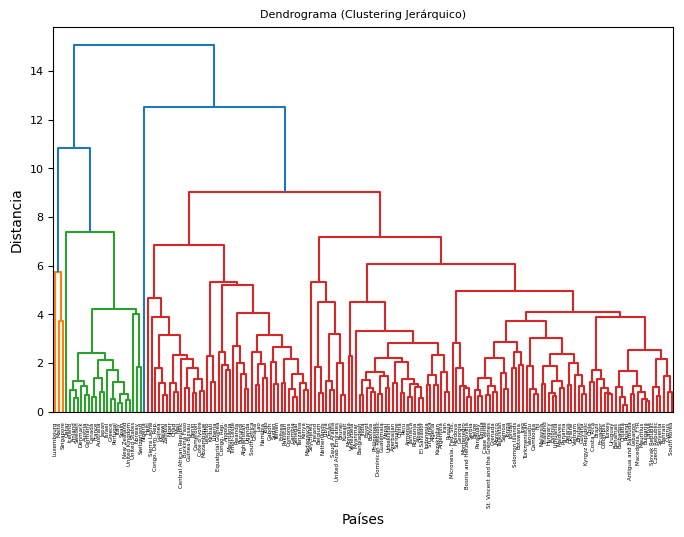

In [84]:
# Crear el dendrograma
linked = linkage(df_num, method='complete')  # Método de enlace simple

plt.figure(figsize=(8, 5))
dendrogram(linked, labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title('Dendrograma (Clustering Jerárquico)', fontsize=8)
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.xticks(fontsize=4)
plt.yticks(fontsize=8)
plt.show()

Aquí la cosa cambia, vemos clusters recomendados que se han agrupado de una forma que puede tener más sentido. Son clusters más compactos que en cierta medida evitan mantener clusters de un único país hasta el final. En su lugar las ramas son más densas. La distancia es mayor que en el enlace simple y eso es porque aquí se toma como distancia la separación más grande entre 2 puntos de 2 clusters y se fusionan aquellos en los que esta distancia sea menor. Vamos a proceder a cortar el dendograma en un valor de distancia igual a 6 a ver que clusters nos genera.

In [85]:
# Determinar el corte en el dendrograma usando un umbral de distancia
threshold = 6 

# Crear los clústeres basados en el corte
clusters = fcluster(linked, threshold, criterion='distance')

# Agregar los clústeres al dataframe
data_copy['Cluster'] = clusters

In [86]:
# Hacemos recuento de países por cada cluster
data_copy['Cluster'].value_counts()

Cluster
8    60
5    28
7    28
2    20
4    16
6    10
1     3
9     1
3     1
Name: count, dtype: int64

Aquí, aunque hay un par de clusters con solo 1 país y otro con solo 3, parece que tenemos clusters con más sentido. Vamos a ver sus promedios y así ver la pinta que tienen.

In [87]:
# Calculamos para cada grupo los valores medios de cada variable
data_copy.drop(columns=['country'], inplace=False).groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
2,4.280000,34.270000,10.501000,32.745000,39690.000000,1.559750,80.970000,1.797500,45060.000000
3,9.000000,62.300000,1.810000,23.800000,125000.000000,6.980000,79.500000,2.070000,70300.000000
4,124.162500,26.193750,6.185000,39.406250,1577.437500,7.910938,54.587500,5.573750,699.375000
5,77.257143,30.096786,6.411429,44.853571,4603.714286,11.029643,61.557143,4.747143,2356.500000
6,10.150000,73.790000,5.526000,57.110000,48640.000000,8.269800,77.360000,2.206000,31370.000000
7,28.442857,28.588893,5.043214,30.595211,10296.428571,12.862143,71.850000,2.383571,4647.071429
8,18.440000,46.066667,7.099833,55.840000,13637.833333,4.529067,73.278333,2.223500,8291.566667
9,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


Se aprecian cosas interesantes. Por lo pronto, uno de los clusters (cluster 9) con solo un país, tiene pinta de volver a ser Nigeria dada su hiperinfación y la alta mortalidad infantil. 

In [90]:
data_copy[data_copy['Cluster']==9].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,9


El cluster 3 también es de un solo país y en este caso tiene como particularidad los niveles de ingresos más elevamos de todos con 125.000 y un ***gdpp*** también de los más altos. Por otro lado, parece extraña la altisima inflación del 7% que tiene y el nivel de salud tan bajo del 1.81. Parece un pais muy rico pero con cierta inestabilidad en lo demográfico y el sistema económico.

In [91]:
data_copy[data_copy['Cluster']==3].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,3


El grupo 1 parece que destaca claramente por unos niveles de exportaciones e importaciones respecto del ***gdpp*** altísimos. Todos los demás indicadores los sitúan entre los países a la cabeza del desarrollo mundial. Lo mismo que los del grupo 2 salvo porque estos últimos tienen un nivel de sanidad muy superior y un nivel económico inferior. El cluster 1 tiene solo 3 países y el 2 tiene 20.

In [93]:
data_copy[data_copy['Cluster']==1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1


Vamos a pintar en mapa estos grupos

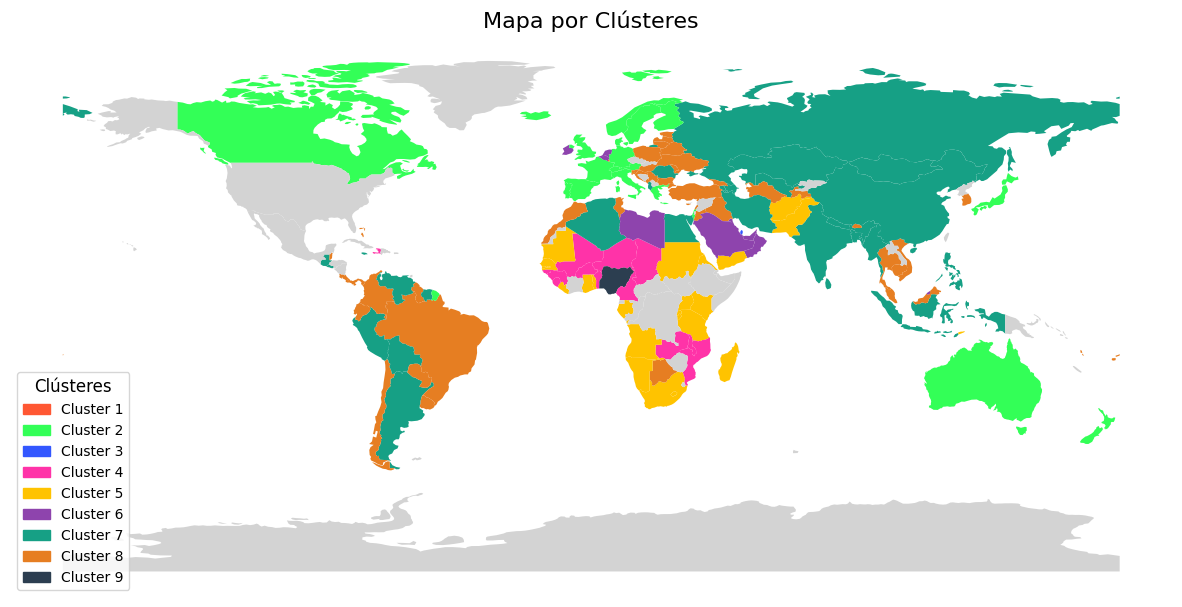

In [92]:
# Cargar el mapa base (geometría de los países)
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Unir los datos de clúster con el mapa base
world = world.merge(data_copy[['country','Cluster']], left_on='NAME', right_on='country', how='left')

# Definir una paleta de colores personalizada con 5 colores únicos
custom_cmap = ListedColormap(['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300', '#8E44AD', '#16A085', '#E67E22', '#2C3E50'])  # Ejemplo: azul, naranja, verde

# Crear el mapa coloreando por clúster
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster',  # Columna para colorear
           cmap=custom_cmap,  # Colores
           legend=False,       # Mostrar la leyenda
           ax=ax,             # Ejes para dibujar
           missing_kwds={"color": "lightgrey", "label": "Sin datos"}  # Países sin datos
           )
# Crear una leyenda personalizada
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9']
legend_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300', '#8E44AD', '#16A085', '#E67E22', '#2C3E50']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
ax.legend(handles=legend_patches, title="Clústeres", loc='lower left', fontsize=10, title_fontsize=12)

# Personalizar el gráfico
ax.set_title('Mapa por Clústeres', fontsize=16)
ax.set_axis_off()  # Ocultar los ejes

plt.show()

Vamos a realizar ahora un enlace de tipo ward. Este enlace prima la densidad interna de los clusters. Es decir, trata de minimizar la varianza intracluster. Se conisguen clusters mucho más compactos y por tanto tiende a haber más clusters al no incurrir en tanta distancia.

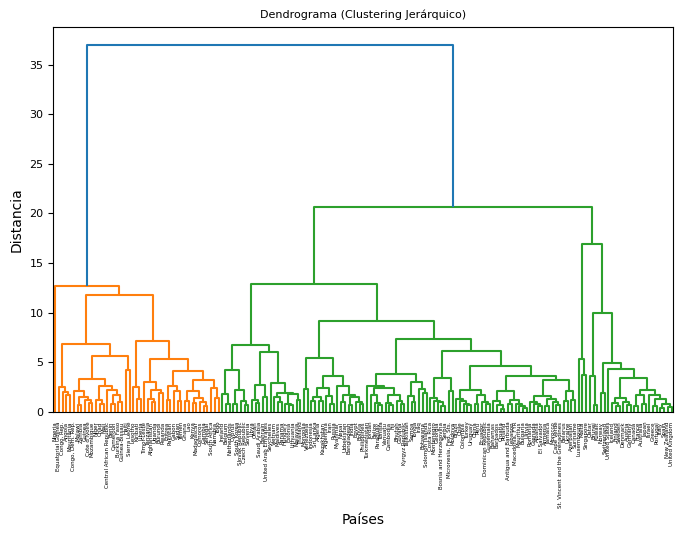

In [97]:
# Crear el dendrograma
linked = linkage(df_num, method='ward')  # Método de enlace simple

plt.figure(figsize=(8, 5))
dendrogram(linked, labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title('Dendrograma (Clustering Jerárquico)', fontsize=8)
plt.xlabel('Países')
plt.ylabel('Distancia')
plt.xticks(fontsize=4)
plt.yticks(fontsize=8)
plt.show()

Si elegimos una distancia de 10, aunque no es lo óptimo para este tipo de enlace, puesto que 10 seguramente sea una distancia muy elevada, nos sirve para ilustrar un poco el proceso.

In [98]:
# Determinar el corte en el dendrograma usando un umbral de distancia
threshold = 10 

# Crear los clústeres basados en el corte
clusters = fcluster(linked, threshold, criterion='distance')

# Agregar los clústeres al dataframe
data_copy['Cluster'] = clusters

In [99]:
# Hacemos recuento de países por cada cluster
data_copy['Cluster'].value_counts()

Cluster
5    74
2    24
7    23
4    22
1    20
6     3
3     1
Name: count, dtype: int64

In [100]:
# Calculamos para cada grupo los valores medios de cada variable
data_copy.drop(columns=['country'], inplace=False).groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
1,118.895000,35.150000,5.658000,42.410000,3667.450000,10.673750,56.150000,5.524000,1788.000000
2,73.829167,23.283750,6.888333,43.258333,3366.416667,9.247083,61.416667,4.650833,1725.500000
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,9.350000,71.577273,6.530909,65.404545,29513.181818,4.583909,76.836364,1.922727,20165.454545
5,24.017568,35.048500,6.396081,44.336026,10647.027027,7.916703,72.113514,2.376486,5728.000000
6,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
7,5.039130,38.339130,9.447826,32.047826,46721.739130,2.872826,80.617391,1.829130,45447.826087


In [101]:
data_copy[data_copy['Cluster']==6].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,6
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,6
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,6


El cluster 6 sigue siendo el que está formado por los 3 países que vimos antes: Luxemburgo, Malta y Singapore. Tres países con unos niveles altísimos de comercio tanto en importaciones como exportaciones, de entre los países de los grupos con más desarrollo.

La diferencia entre el cluster 1 y 2, siendo dentro del grupo de los países en vías de desarrollo, radica en la tasa de mortalidad infantil. El cluster 1 tiene una mortalidad infantil mucho más elevada.

El cluster 5 sigue siendo un cluster intermedio entre los grupos de países que lideran el desarrollo mundial y los que están en vías de desarrollo. Es el grupo más numeroso.

Y los clusters 4 y 7 serían los clusters en los que se subdividen los países con mayor desarrollo. La diferencia entre ellos es bastante global de todas las variables, no hay una en particular que marca la diferencia sino que todos los indicadores en general apuntan más en un sentido. Siendo el cluster 7 el que tendría un mayor desarrollo.

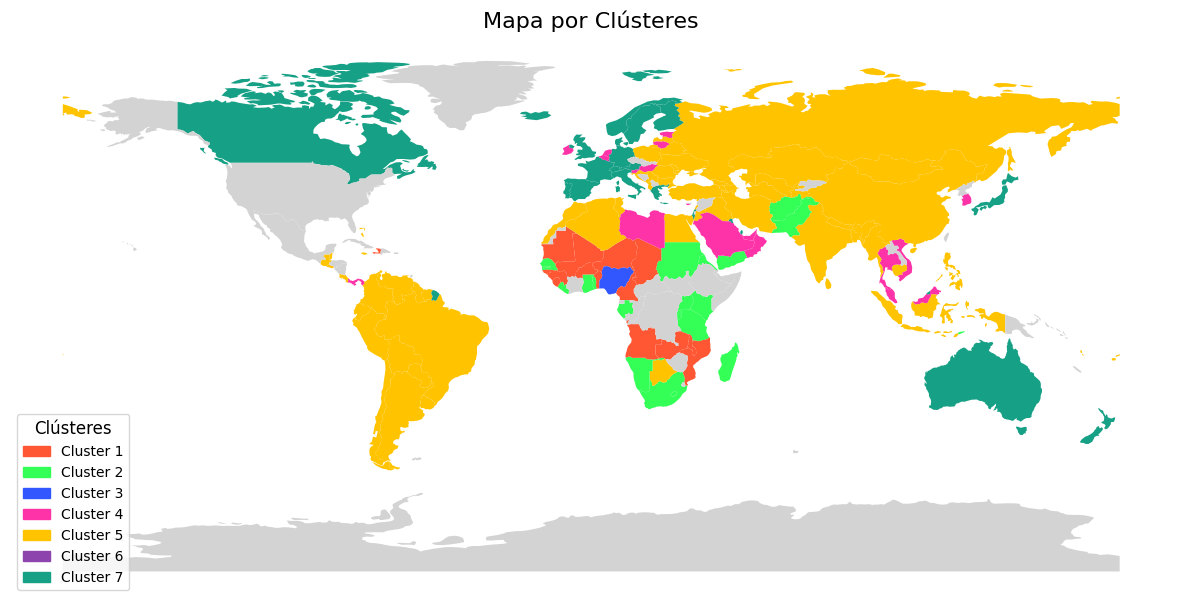

In [102]:
# Cargar el mapa base (geometría de los países)
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Unir los datos de clúster con el mapa base
world = world.merge(data_copy[['country','Cluster']], left_on='NAME', right_on='country', how='left')

# Definir una paleta de colores personalizada con 5 colores únicos
custom_cmap = ListedColormap(['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300', '#8E44AD', '#16A085'])  # Ejemplo: azul, naranja, verde

# Crear el mapa coloreando por clúster
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster',  # Columna para colorear
           cmap=custom_cmap,  # Colores
           legend=False,       # Mostrar la leyenda
           ax=ax,             # Ejes para dibujar
           missing_kwds={"color": "lightgrey", "label": "Sin datos"}  # Países sin datos
           )
# Crear una leyenda personalizada
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']
legend_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300', '#8E44AD', '#16A085']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
ax.legend(handles=legend_patches, title="Clústeres", loc='lower left', fontsize=10, title_fontsize=12)

# Personalizar el gráfico
ax.set_title('Mapa por Clústeres', fontsize=16)
ax.set_axis_off()  # Ocultar los ejes

plt.show()